# Johnatan Meoño: 19000503
# Parte 1
# Red Neuronal Estandar

In [1]:
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf

C:\Users\Johnatan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [339]:
df = pd.read_csv('airfoil_self_noise.dat', sep="\t", header=None)

In [340]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [341]:
df.rename(columns={0: 'Frequency_in_Hertzs', 1: 'Angle_of_attack_in_degrees', 
                   2: 'Chord_length_in_meters', 3: 'Free_stream_velocity', 
                   4: 'Suction_side_displacement_thickness_in_meters', 5: 'Scaled_sound_pressure_level_in_decibels'}, 
          inplace=True)
df.head()

,Frequency_in_Hertzs,Angle_of_attack_in_degrees,Chord_length_in_meters,Free_stream_velocity,Suction_side_displacement_thickness_in_meters,Scaled_sound_pressure_level_in_decibels
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [342]:
df.max()

Frequency_in_Hertzs                              20000.000000
Angle_of_attack_in_degrees                          22.200000
Chord_length_in_meters                               0.304800
Free_stream_velocity                                71.300000
Suction_side_displacement_thickness_in_meters        0.058411
Scaled_sound_pressure_level_in_decibels            140.987000
dtype: float64

In [343]:
df.min()

Frequency_in_Hertzs                              200.000000
Angle_of_attack_in_degrees                         0.000000
Chord_length_in_meters                             0.025400
Free_stream_velocity                              31.700000
Suction_side_displacement_thickness_in_meters      0.000401
Scaled_sound_pressure_level_in_decibels          103.380000
dtype: float64

In [344]:
## revisando cada columna, para saber si tiene valores NaN
df.isnull().sum()

Frequency_in_Hertzs                              0
Angle_of_attack_in_degrees                       0
Chord_length_in_meters                           0
Free_stream_velocity                             0
Suction_side_displacement_thickness_in_meters    0
Scaled_sound_pressure_level_in_decibels          0
dtype: int64

# Normalización

In [345]:
df.Frequency_in_Hertzs = df.Frequency_in_Hertzs/20000

In [346]:
df.head()

,Frequency_in_Hertzs,Angle_of_attack_in_degrees,Chord_length_in_meters,Free_stream_velocity,Suction_side_displacement_thickness_in_meters,Scaled_sound_pressure_level_in_decibels
0,0.0400,0.0,0.3048,71.3,0.002663,126.201
1,0.0500,0.0,0.3048,71.3,0.002663,125.201
2,0.0625,0.0,0.3048,71.3,0.002663,125.951
3,0.0800,0.0,0.3048,71.3,0.002663,127.591
4,0.1000,0.0,0.3048,71.3,0.002663,127.461


In [347]:
df.Free_stream_velocity = df.Free_stream_velocity/71.3 

In [348]:
df.head()

,Frequency_in_Hertzs,Angle_of_attack_in_degrees,Chord_length_in_meters,Free_stream_velocity,Suction_side_displacement_thickness_in_meters,Scaled_sound_pressure_level_in_decibels
0,0.0400,0.0,0.3048,1.0,0.002663,126.201
1,0.0500,0.0,0.3048,1.0,0.002663,125.201
2,0.0625,0.0,0.3048,1.0,0.002663,125.951
3,0.0800,0.0,0.3048,1.0,0.002663,127.591
4,0.1000,0.0,0.3048,1.0,0.002663,127.461


In [349]:
df.Scaled_sound_pressure_level_in_decibels = df.Scaled_sound_pressure_level_in_decibels/140.987000

In [350]:
df.head()

,Frequency_in_Hertzs,Angle_of_attack_in_degrees,Chord_length_in_meters,Free_stream_velocity,Suction_side_displacement_thickness_in_meters,Scaled_sound_pressure_level_in_decibels
0,0.0400,0.0,0.3048,1.0,0.002663,0.895125
1,0.0500,0.0,0.3048,1.0,0.002663,0.888032
2,0.0625,0.0,0.3048,1.0,0.002663,0.893352
3,0.0800,0.0,0.3048,1.0,0.002663,0.904984
4,0.1000,0.0,0.3048,1.0,0.002663,0.904062


# Separación de data en: train, validation, test

In [351]:
## esta llamanada sirve para la fucion que separara datos 
from sklearn.model_selection import train_test_split

In [352]:
## convirtiendo data frame de pandas a numpy array
datos = df.values
datos

array([[4.00000000e-02, 0.00000000e+00, 3.04800000e-01, 1.00000000e+00,
        2.66337000e-03, 8.95125082e-01],
       [5.00000000e-02, 0.00000000e+00, 3.04800000e-01, 1.00000000e+00,
        2.66337000e-03, 8.88032230e-01],
       [6.25000000e-02, 0.00000000e+00, 3.04800000e-01, 1.00000000e+00,
        2.66337000e-03, 8.93351869e-01],
       ...,
       [2.00000000e-01, 1.56000000e+01, 1.01600000e-01, 5.55399719e-01,
        5.28487000e-02, 7.56126451e-01],
       [2.50000000e-01, 1.56000000e+01, 1.01600000e-01, 5.55399719e-01,
        5.28487000e-02, 7.53431167e-01],
       [3.15000000e-01, 1.56000000e+01, 1.01600000e-01, 5.55399719e-01,
        5.28487000e-02, 7.39103605e-01]])

In [353]:
print("Rango: ", datos.ndim)
print("Forma: ", datos.shape)
print("Tipy: ", type(datos))
print(datos)

Rango:  2
Forma:  (1503, 6)
Tipy:  <class 'numpy.ndarray'>
[[4.00000000e-02 0.00000000e+00 3.04800000e-01 1.00000000e+00
  2.66337000e-03 8.95125082e-01]
 [5.00000000e-02 0.00000000e+00 3.04800000e-01 1.00000000e+00
  2.66337000e-03 8.88032230e-01]
 [6.25000000e-02 0.00000000e+00 3.04800000e-01 1.00000000e+00
  2.66337000e-03 8.93351869e-01]
 ...
 [2.00000000e-01 1.56000000e+01 1.01600000e-01 5.55399719e-01
  5.28487000e-02 7.56126451e-01]
 [2.50000000e-01 1.56000000e+01 1.01600000e-01 5.55399719e-01
  5.28487000e-02 7.53431167e-01]
 [3.15000000e-01 1.56000000e+01 1.01600000e-01 5.55399719e-01
  5.28487000e-02 7.39103605e-01]]


In [354]:
## separacion de datos 
train_vali, test = train_test_split(datos, test_size=0.20) #, random_state=seem

In [355]:
print("Rango: ", train_vali.ndim)
print("Forma: ", train_vali.shape)
print("Type: ", type(train_vali))
print(train_vali)

Rango:  2
Forma:  (1202, 6)
Type:  <class 'numpy.ndarray'>
[[1.00000000e-02 1.26000000e+01 1.52400000e-01 1.00000000e+00
  4.83159000e-02 9.10395994e-01]
 [2.50000000e-01 0.00000000e+00 1.01600000e-01 5.55399719e-01
  1.46332000e-03 8.93848369e-01]
 [2.00000000e-02 1.54000000e+01 5.08000000e-02 4.44600281e-01
  2.89853000e-02 8.77421323e-01]
 ...
 [3.15000000e-01 1.23000000e+01 1.01600000e-01 1.00000000e+00
  3.37792000e-02 8.08287289e-01]
 [4.00000000e-01 3.30000000e+00 1.01600000e-01 1.00000000e+00
  2.02822000e-03 8.59894884e-01]
 [2.00000000e-02 7.30000000e+00 2.28600000e-01 7.78401122e-01
  1.11706000e-02 9.64088888e-01]]


# Test

In [356]:
print("Rango: ", test.ndim)
print("Forma: ", test.shape)
print("Tipy: ", type(test))
print(test)

Rango:  2
Forma:  (301, 6)
Tipy:  <class 'numpy.ndarray'>
[[1.25000000e-02 9.90000000e+00 1.52400000e-01 5.55399719e-01
  2.33328000e-02 9.10261230e-01]
 [1.25000000e-02 1.26000000e+01 1.52400000e-01 1.00000000e+00
  4.83159000e-02 9.20255059e-01]
 [8.00000000e-01 0.00000000e+00 1.52400000e-01 7.78401122e-01
  1.72668000e-03 8.00095044e-01]
 ...
 [5.00000000e-02 1.12000000e+01 5.08000000e-02 5.55399719e-01
  1.50478000e-02 9.39306461e-01]
 [4.00000000e-02 1.74000000e+01 2.54000000e-02 7.78401122e-01
  1.65706000e-02 8.73066311e-01]
 [2.00000000e-02 4.00000000e+00 2.28600000e-01 7.78401122e-01
  4.28620000e-03 8.74364303e-01]]


# Equis de test o prueba

In [357]:
X_test = test[:,0:5]
X_test

array([[1.25000000e-02, 9.90000000e+00, 1.52400000e-01, 5.55399719e-01,
        2.33328000e-02],
       [1.25000000e-02, 1.26000000e+01, 1.52400000e-01, 1.00000000e+00,
        4.83159000e-02],
       [8.00000000e-01, 0.00000000e+00, 1.52400000e-01, 7.78401122e-01,
        1.72668000e-03],
       ...,
       [5.00000000e-02, 1.12000000e+01, 5.08000000e-02, 5.55399719e-01,
        1.50478000e-02],
       [4.00000000e-02, 1.74000000e+01, 2.54000000e-02, 7.78401122e-01,
        1.65706000e-02],
       [2.00000000e-02, 4.00000000e+00, 2.28600000e-01, 7.78401122e-01,
        4.28620000e-03]])

# yes de test o prueba

In [358]:
Y_test = test[:,5]
Y_test = Y_test.reshape(301,1)
print("Rango: ", Y_test.ndim)
print("Forma: ", Y_test.shape)
print("Tipy: ", type(Y_test))
print(Y_test)

Rango:  2
Forma:  (301, 1)
Tipy:  <class 'numpy.ndarray'>
[[0.91026123]
 [0.92025506]
 [0.80009504]
 [0.87390327]
 [0.80203139]
 [0.89967869]
 [0.9273621 ]
 [0.94364729]
 [0.92329789]
 [0.94512969]
 [0.91863789]
 [0.94759091]
 [0.91524041]
 [0.85522069]
 [0.92181549]
 [0.81361402]
 [0.90712619]
 [0.86294481]
 [0.9436331 ]
 [0.9058282 ]
 [0.85580231]
 [0.91777965]
 [0.78279558]
 [0.94427146]
 [0.92539738]
 [0.81786973]
 [0.86129218]
 [0.85990198]
 [0.80181151]
 [0.91524751]
 [0.80210232]
 [0.89367814]
 [0.89404697]
 [0.90528914]
 [0.90312582]
 [0.90613319]
 [0.93345486]
 [0.82667196]
 [0.95270486]
 [0.83511955]
 [0.93653316]
 [0.85229135]
 [0.84863143]
 [0.84363097]
 [0.93489471]
 [0.8873655 ]
 [0.79798847]
 [0.84784413]
 [0.97190521]
 [0.87166193]
 [0.93048295]
 [0.81077688]
 [0.92170909]
 [0.89267805]
 [0.94342032]
 [0.9288445 ]
 [0.86814387]
 [0.90253711]
 [0.81628093]
 [0.90531042]
 [0.85439083]
 [0.94059027]
 [0.9016576 ]
 [0.94261882]
 [0.76626923]
 [0.89896941]
 [0.86529964]
 [0.

# Train validation

In [359]:
train, validation = train_test_split(train_vali, 
                                     test_size=0.20) #, random_state=seem

# Train 

In [360]:
print("Rango: ", train.ndim)
print("Forma: ", train.shape)
print("Type: ", type(train))
print(train)

Rango:  2
Forma:  (961, 6)
Type:  <class 'numpy.ndarray'>
[[3.15000000e-01 5.40000000e+00 1.52400000e-01 5.55399719e-01
  4.85029000e-03 8.27572755e-01]
 [8.00000000e-02 7.30000000e+00 2.28600000e-01 7.78401122e-01
  1.11706000e-02 8.74931731e-01]
 [8.00000000e-02 9.50000000e+00 2.54000000e-02 4.44600281e-01
  4.61377000e-03 9.29419024e-01]
 ...
 [1.57500000e-01 0.00000000e+00 3.04800000e-01 7.78401122e-01
  2.83081000e-03 8.74094775e-01]
 [4.00000000e-01 0.00000000e+00 2.28600000e-01 1.00000000e+00
  2.14345000e-03 8.37126827e-01]
 [1.57500000e-02 9.90000000e+00 1.52400000e-01 7.78401122e-01
  2.08438000e-02 9.38774497e-01]]


# Equis de train o etrenamiento

In [361]:
## features o x
X_train = train[:,0:5]
print("Rango: ", X_train .ndim)
print("Forma: ", X_train .shape)
print("Tipy: ", type(X_train ))
print(X_train )

Rango:  2
Forma:  (961, 5)
Tipy:  <class 'numpy.ndarray'>
[[3.15000000e-01 5.40000000e+00 1.52400000e-01 5.55399719e-01
  4.85029000e-03]
 [8.00000000e-02 7.30000000e+00 2.28600000e-01 7.78401122e-01
  1.11706000e-02]
 [8.00000000e-02 9.50000000e+00 2.54000000e-02 4.44600281e-01
  4.61377000e-03]
 ...
 [1.57500000e-01 0.00000000e+00 3.04800000e-01 7.78401122e-01
  2.83081000e-03]
 [4.00000000e-01 0.00000000e+00 2.28600000e-01 1.00000000e+00
  2.14345000e-03]
 [1.57500000e-02 9.90000000e+00 1.52400000e-01 7.78401122e-01
  2.08438000e-02]]


# yes de train o entrenamiento

In [362]:
## Y 
## extrayendo solo la columna 5 que son las y, recordar que en pyton se cuenta a partir de cero
## 0, 1, 2, 3, 4, 5, 6
Y_train = train[:,5]
Y_train = Y_train.reshape(961,1)
print("Rango: ", Y_train.ndim)
print("Forma: ", Y_train.shape)
print("Tipy: ", type(Y_train))
print(Y_train)

Rango:  2
Forma:  (961, 1)
Tipy:  <class 'numpy.ndarray'>
[[0.82757275]
 [0.87493173]
 [0.92941902]
 [0.97056466]
 [0.84880166]
 [0.88576252]
 [0.9307312 ]
 [0.83643882]
 [0.85176647]
 [0.91704909]
 [0.95914517]
 [0.89229503]
 [0.87564811]
 [0.86273912]
 [0.81035131]
 [0.81882727]
 [0.92907147]
 [0.9105875 ]
 [0.83446701]
 [0.81986992]
 [0.87011568]
 [0.84454595]
 [0.86756226]
 [0.92512076]
 [0.8827055 ]
 [0.93264627]
 [0.99163753]
 [0.95044224]
 [0.91367289]
 [0.87655599]
 [0.83632533]
 [0.90169306]
 [0.95919482]
 [0.89558612]
 [0.90498415]
 [0.86112195]
 [0.87034975]
 [0.83414783]
 [0.90908382]
 [0.92472356]
 [0.90206189]
 [0.85507884]
 [0.91482193]
 [0.87210878]
 [0.85992326]
 [0.8578947 ]
 [0.92968855]
 [0.90491322]
 [0.90567215]
 [0.87396001]
 [0.89343698]
 [0.84200671]
 [0.88345025]
 [0.92908566]
 [0.79691745]
 [0.93715733]
 [0.8801237 ]
 [0.91283594]
 [0.79617979]
 [0.9023527 ]
 [0.93469611]
 [0.91294233]
 [0.87692482]
 [0.82384191]
 [0.82789903]
 [0.91599935]
 [0.90075681]
 [0.

# validation

In [363]:
print("Rango: ", validation.ndim)
print("Forma: ", validation.shape)
print("Tipy: ", type(validation))
print(validation)

Rango:  2
Forma:  (241, 6)
Tipy:  <class 'numpy.ndarray'>
[[6.25000000e-02 4.00000000e+00 3.04800000e-01 5.55399719e-01
  5.79636000e-03 8.96132268e-01]
 [1.57500000e-02 1.23000000e+01 1.01600000e-01 7.78401122e-01
  3.68233000e-02 9.62315674e-01]
 [4.00000000e-02 5.40000000e+00 1.52400000e-01 5.55399719e-01
  4.85029000e-03 9.41625824e-01]
 ...
 [6.25000000e-02 4.00000000e+00 2.28600000e-01 5.55399719e-01
  4.73801000e-03 9.10289601e-01]
 [6.25000000e-02 5.30000000e+00 2.28600000e-01 1.00000000e+00
  5.19420000e-03 9.46044671e-01]
 [3.15000000e-01 4.00000000e+00 2.28600000e-01 4.44600281e-01
  5.09068000e-03 7.99357388e-01]]


# equis de validación

In [364]:
X_validation = validation[:,0:5]
print("Rango: ", X_validation.ndim)
print("Forma: ", X_validation.shape)
print("Tipy: ", type(X_train ))
print(X_validation)

Rango:  2
Forma:  (241, 5)
Tipy:  <class 'numpy.ndarray'>
[[6.25000000e-02 4.00000000e+00 3.04800000e-01 5.55399719e-01
  5.79636000e-03]
 [1.57500000e-02 1.23000000e+01 1.01600000e-01 7.78401122e-01
  3.68233000e-02]
 [4.00000000e-02 5.40000000e+00 1.52400000e-01 5.55399719e-01
  4.85029000e-03]
 ...
 [6.25000000e-02 4.00000000e+00 2.28600000e-01 5.55399719e-01
  4.73801000e-03]
 [6.25000000e-02 5.30000000e+00 2.28600000e-01 1.00000000e+00
  5.19420000e-03]
 [3.15000000e-01 4.00000000e+00 2.28600000e-01 4.44600281e-01
  5.09068000e-03]]


# yes de validación

In [365]:
Y_validation = validation[:,5]
Y_validation = Y_validation.reshape(241,1)
print("Rango: ", Y_validation.ndim)
print("Forma: ", Y_validation.shape)
print("Type: ", type(Y_validation))
print(Y_validation)

Rango:  2
Forma:  (241, 1)
Type:  <class 'numpy.ndarray'>
[[0.89613227]
 [0.96231567]
 [0.94162582]
 [0.8981821 ]
 [0.88592565]
 [0.9636775 ]
 [0.93686652]
 [0.91689305]
 [0.90345209]
 [0.90558704]
 [0.83292786]
 [0.80205976]
 [0.90565797]
 [0.73325909]
 [0.92515622]
 [0.86687425]
 [0.86656926]
 [0.92065226]
 [0.88995439]
 [0.93593736]
 [0.90737444]
 [0.89617482]
 [0.81779171]
 [0.97000433]
 [0.88231539]
 [0.81556456]
 [0.92345394]
 [0.92659607]
 [0.91499216]
 [0.91829743]
 [0.84095697]
 [0.81898331]
 [0.81308206]
 [0.86005093]
 [0.90218956]
 [0.84845411]
 [0.88061311]
 [0.86699483]
 [0.86866874]
 [0.81496876]
 [0.87463383]
 [0.93610049]
 [0.79559818]
 [0.89730259]
 [0.8408222 ]
 [0.91403463]
 [0.91202026]
 [0.8375524 ]
 [0.85983105]
 [0.8495606 ]
 [0.88203877]
 [0.90146609]
 [0.84508501]
 [0.91072936]
 [0.89829559]
 [0.87814479]
 [0.82962968]
 [0.89770688]
 [0.9052253 ]
 [0.90521112]
 [0.89614645]
 [0.85717832]
 [0.89175598]
 [0.86378886]
 [0.78243384]
 [0.89245108]
 [0.85430572]
 [0.

# Red Neuronal Estandar

# Grafo

In [414]:
grafofefonet = tf.Graph()
with grafofefonet.as_default():
    
    with tf.name_scope("Declaring_placeholder"):    
        ## definiendo las X, 784 es el valor pues 784 son las x features luego del reshape 
        X = tf.placeholder(tf.float32, [None,5], name="X")
    
        ## definiendo las Y, 3 es el valor pues tres son las categorias
        Y = tf.placeholder(tf.float32, [None,1], name="Y")
    
        # estableciendo el learning rate placeholder
        ph_lr_g = tf.placeholder(dtype = tf.float64, name="LR")
        
    with tf.name_scope("Declaring_variables"):
        ## Matriz de parametros CAPA INTEMEDIA 1 
        ## inicializacion JAVIER de adentro hacia fuera suma, division, raiz y como es un flota 64 se pasa a float 32
        ## tf.cast(tf.sqrt(tf.divide(2,tf.add(5,3))),tf.float32)
        W_kpa_inter_1_g = tf.Variable(tf.multiply(tf.random_normal([5,3]),tf.cast(tf.sqrt(tf.divide(2,tf.add(5,3))),tf.float32)), name = "W1") 
        #W_kpa_inter_1_g = tf.Variable(tf.random_normal([5,4]), name = "W1")
    
        ## Vector bias o de termino independiente CAPA INTEMEDIA 1
        B_kpa_inter_1_g = tf.Variable(tf.random_normal([1,3]), name = "B1")
        
        ## Matriz de parametros CAPA INTEMEDIA 2
        W_kpa_inter_2_g = tf.Variable(tf.multiply(tf.random_normal([3,2]),tf.cast(tf.sqrt(tf.divide(2,tf.add(3,2))),tf.float32)), name = "W2")
        #W_kpa_inter_2_g = tf.Variable(tf.random_normal([4,3]), name = "W2")
    
        ## Vector bias o de termino independiente CAPA INTEMEDIA 2
        B_kpa_inter_2_g = tf.Variable(tf.random_normal([1,2]), name = "B2")
        
        ## Matriz de parametros CAPA FINAL
        W_kpa_final_g = tf.Variable(tf.multiply(tf.random_normal([2,1]),tf.cast(tf.sqrt(tf.divide(2,tf.add(2,1))),tf.float32)), name = "Wf")
        #W_kpa_final_g = tf.Variable(tf.random_normal([3,1]), name = "Wf")
    
        ## Vector bias o de termino independiente CAPA FINAL
        B_kpa_final_g = tf.Variable(tf.random_normal([1,1]), name = "Bf")
    
    with tf.name_scope("hipotesis"):   
        ## CAPA INTEMEDIA 1 
        kpa_inter_1 = tf.add(tf.matmul(X, W_kpa_inter_1_g, name="hipotesis_producto_punto"), B_kpa_inter_1_g, name="hipotesis_sumar_B") 
        kpa_inter_1_act = tf.nn.leaky_relu(kpa_inter_1) #tf.nn.relu,tf.sigmoid
        
        ## CAPA INTEMEDIA 2 
        kpa_inter_2 = tf.add(tf.matmul(kpa_inter_1_act, W_kpa_inter_2_g, name="hipotesis_producto_punto"), B_kpa_inter_2_g, name="hipotesis_sumar_B") 
        kpa_inter_2_act = tf.nn.leaky_relu(kpa_inter_2) #tf.nn.relu,tf.sigmoid
        
        ## CAPA FINAL
        kpa_final = tf.add(tf.matmul(kpa_inter_2_act, W_kpa_final_g, name="hipotesis_producto_punto"), B_kpa_final_g, name="hipotesis_sumar_B") 
        kpa_final_act = kpa_final #tf.nn.relu #activacion de la salida relu pues el decibel mas bajo es cero 
        
    with tf.name_scope("funcion_costo"):
        # calculando la fucion de costo MSE que es fatible usar para activación identidad y relu ver referencias 
        costo_g = tf.losses.mean_squared_error(Y,kpa_final_act)
        
    with tf.name_scope("Gradient_Des.Optimizer"):
          
        ## gradient descent para optimizar un nodo mas del grafo
        #optimizacion_g = tf.train.GradientDescentOptimizer(ph_lr_g).minimize(costo_g)
        optimizacion_g = tf.train.AdamOptimizer(ph_lr_g).minimize(costo_g)

In [415]:
def entrenamiento(equis,yes,batch_size,epochs,lr,imprimir_cada,XV,YV,XP,YP):
    
    with tf.Session(graph = grafofefonet) as session:
        batches = int(equis.shape[0] / batch_size)
        iteracion_k = []
        costo_k = []
        # incializando variables
        tf.global_variables_initializer().run()
        print('Initialized')
        
        for epoch in range(epochs):
            for i in range(batches):
                offset = i * epoch 
                x = equis[offset: offset + batch_size] 
                y = yes[offset: offset + batch_size]
                
            # sesion que ejecuta los nodos y envia informacion con feed_dict al nodo del learning rate
            costo_s,optimizacion_s,w1s,b1s,w2s,b2s,w3s,b3s=session.run([costo_g,optimizacion_g,W_kpa_inter_1_g,B_kpa_inter_1_g,
                                                                        W_kpa_inter_2_g,B_kpa_inter_2_g,W_kpa_final_g,B_kpa_final_g],feed_dict={X:x, Y:y, ph_lr_g:lr})
            
            iteracion_k.append(epoch)
            costo_k.append(costo_s)
        
            if (epoch % imprimir_cada == 0):
                print("Iteracion:", epoch, "Error:", costo_s) ##
        
        ## usando el grafo con los datos de validación 
        costo_v_s, pronostico_v_s = session.run([costo_g, kpa_final_act], feed_dict={X:XV, Y:YV})
        
        ## usando el grafo con los datos de prueba
        costo_p_s, pronostico_p_s = session.run([costo_g, kpa_final_act], feed_dict={X:XP, Y:YP})
                       
    cadena_config = "AS""_Reg""_GD""_epochs="+str(epochs)+"_LR="+str(lr)
    
    ## Gráfica 
    fig  = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(iteracion_k,costo_k)
    plt.show()
    
    TableOut = pd.DataFrame({'Iteración k':iteracion_k, 'Costo':costo_k}) #, 'W_k':w_k, 'Dirección': pk, 'Norma': norma_k
    return cadena_config,costo_s,costo_v_s,costo_p_s,pronostico_p_s,w1s,b1s,w2s,b2s,w3s,b3s         

Initialized
Iteracion: 0 Error: 2.3835483
Iteracion: 1 Error: 178.07294
Iteracion: 2 Error: 5.20063
Iteracion: 3 Error: 9.959926
Iteracion: 4 Error: 43.578804
Iteracion: 5 Error: 1.03581
Iteracion: 6 Error: 39.152275
Iteracion: 7 Error: 24.674618
Iteracion: 8 Error: 37.817856
Iteracion: 9 Error: 9.587282
Iteracion: 10 Error: 44.162605
Iteracion: 11 Error: 3.5280976
Iteracion: 12 Error: 37.91534
Iteracion: 13 Error: 3.1680083
Iteracion: 14 Error: 42.395866
Iteracion: 15 Error: 23.071453
Iteracion: 16 Error: 19.227768
Iteracion: 17 Error: 5.083295
Iteracion: 18 Error: 15.136178
Iteracion: 19 Error: 2.0487387
Iteracion: 20 Error: 7.053255
Iteracion: 21 Error: 8.966364
Iteracion: 22 Error: 3.7313833
Iteracion: 23 Error: 4.0484867
Iteracion: 24 Error: 5.9678674


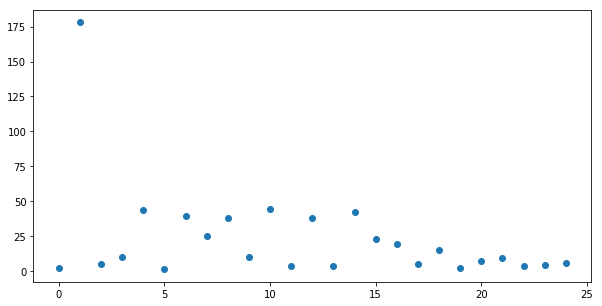

In [484]:
kdnacon_1,costo_train_1,costo_val_1,costo_p_1,pronostico_1,w1e1,b1e1,w2e1,b2e1,w3e1,b3e1=entrenamiento(X_train,Y_train,32,25,1,1,X_validation,Y_validation,X_test,Y_test)

Initialized
Iteracion: 0 Error: 0.3355597
Iteracion: 1 Error: 0.038989097
Iteracion: 2 Error: 0.05583425
Iteracion: 3 Error: 0.122416675
Iteracion: 4 Error: 0.10461014
Iteracion: 5 Error: 0.056951743
Iteracion: 6 Error: 0.011777738
Iteracion: 7 Error: 0.0025481232
Iteracion: 8 Error: 0.017183024
Iteracion: 9 Error: 0.04050045
Iteracion: 10 Error: 0.02852888
Iteracion: 11 Error: 0.044129204
Iteracion: 12 Error: 0.019006193
Iteracion: 13 Error: 0.023836862
Iteracion: 14 Error: 0.011736151
Iteracion: 15 Error: 0.01457214
Iteracion: 16 Error: 0.010743706
Iteracion: 17 Error: 0.010933878
Iteracion: 18 Error: 0.017110692
Iteracion: 19 Error: 0.016736388
Iteracion: 20 Error: 0.013571622
Iteracion: 21 Error: 0.016582925
Iteracion: 22 Error: 0.014338859
Iteracion: 23 Error: 0.013874367
Iteracion: 24 Error: 0.0048950724


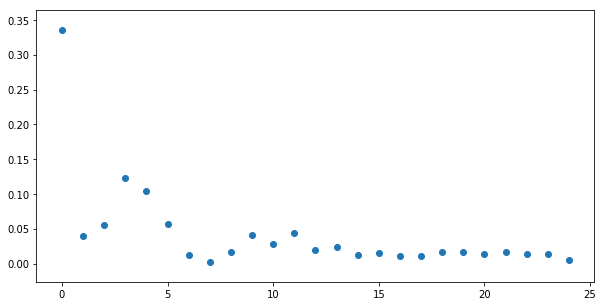

In [485]:
kdnacon_2,costo_train_2,costo_val_2,costo_p_2,pronostico_2,w1e2,b1e2,w2e2,b2e2,w3e2,b3e2=entrenamiento(X_train,Y_train,32,25,0.1,1,X_validation,Y_validation,X_test,Y_test)

Initialized
Iteracion: 0 Error: 0.054049972
Iteracion: 1 Error: 0.030004859
Iteracion: 2 Error: 0.023535343
Iteracion: 3 Error: 0.012590926
Iteracion: 4 Error: 0.017099751
Iteracion: 5 Error: 0.024129758
Iteracion: 6 Error: 0.024010565
Iteracion: 7 Error: 0.01917156
Iteracion: 8 Error: 0.021376159
Iteracion: 9 Error: 0.016982868
Iteracion: 10 Error: 0.009097914
Iteracion: 11 Error: 0.0066505466
Iteracion: 12 Error: 0.0061910003
Iteracion: 13 Error: 0.006018252
Iteracion: 14 Error: 0.004766153
Iteracion: 15 Error: 0.006155166
Iteracion: 16 Error: 0.004413554
Iteracion: 17 Error: 0.0052338736
Iteracion: 18 Error: 0.005953999
Iteracion: 19 Error: 0.00756817
Iteracion: 20 Error: 0.0068255584
Iteracion: 21 Error: 0.0061548343
Iteracion: 22 Error: 0.005407416
Iteracion: 23 Error: 0.005766729
Iteracion: 24 Error: 0.003851985


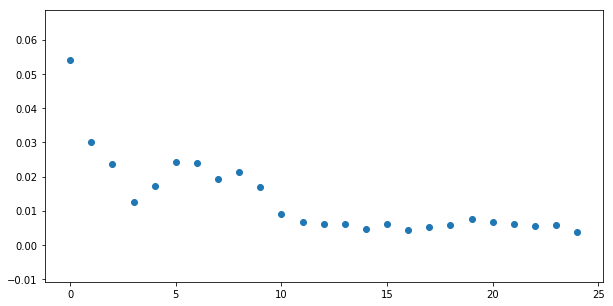

In [486]:
kdnacon_3,costo_train_3,costo_val_3,costo_p_3,pronostico_3,w1e3,b1e3,w2e3,b2e3,w3e3,b3e3=entrenamiento(X_train,Y_train,32,25,0.01,1,X_validation,Y_validation,X_test,Y_test)

Initialized
Iteracion: 0 Error: 1.4309509
Iteracion: 1 Error: 1.3677366
Iteracion: 2 Error: 1.4194764
Iteracion: 3 Error: 1.3170077
Iteracion: 4 Error: 1.4584899
Iteracion: 5 Error: 1.2616446
Iteracion: 6 Error: 1.2333841
Iteracion: 7 Error: 1.2672601
Iteracion: 8 Error: 1.1592544
Iteracion: 9 Error: 1.1441048
Iteracion: 10 Error: 1.2783228
Iteracion: 11 Error: 1.3712244
Iteracion: 12 Error: 1.1935649
Iteracion: 13 Error: 1.2941239
Iteracion: 14 Error: 1.11069
Iteracion: 15 Error: 1.2193902
Iteracion: 16 Error: 1.179332
Iteracion: 17 Error: 1.0975726
Iteracion: 18 Error: 1.1605132
Iteracion: 19 Error: 1.2686119
Iteracion: 20 Error: 1.1560681
Iteracion: 21 Error: 1.3014289
Iteracion: 22 Error: 1.4166951
Iteracion: 23 Error: 1.230683
Iteracion: 24 Error: 1.3862653


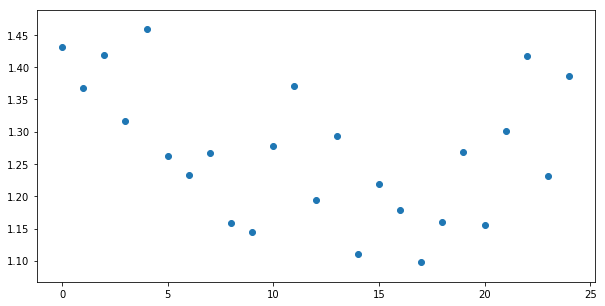

In [487]:
kdnacon_4,costo_train_4,costo_val_4,costo_p_4,pronostico_4,w1e4,b1e4,w2e4,b2e4,w3e4,b3e4=entrenamiento(X_train,Y_train,32,25,0.001,1,X_validation,Y_validation,X_test,Y_test)

Initialized
Iteracion: 0 Error: 2.044083
Iteracion: 1 Error: 2.0199335
Iteracion: 2 Error: 1.9969428
Iteracion: 3 Error: 2.0510845
Iteracion: 4 Error: 2.0003724
Iteracion: 5 Error: 1.950691
Iteracion: 6 Error: 1.9484681
Iteracion: 7 Error: 2.0194545
Iteracion: 8 Error: 1.9456742
Iteracion: 9 Error: 1.9366176
Iteracion: 10 Error: 2.0515068
Iteracion: 11 Error: 2.046989
Iteracion: 12 Error: 1.9478519
Iteracion: 13 Error: 1.9836144
Iteracion: 14 Error: 1.9180381
Iteracion: 15 Error: 1.9924014
Iteracion: 16 Error: 2.0046048
Iteracion: 17 Error: 1.9282632
Iteracion: 18 Error: 1.9800661
Iteracion: 19 Error: 1.9896166
Iteracion: 20 Error: 1.9652085
Iteracion: 21 Error: 2.01461
Iteracion: 22 Error: 2.0383964
Iteracion: 23 Error: 1.9613633
Iteracion: 24 Error: 2.0508559


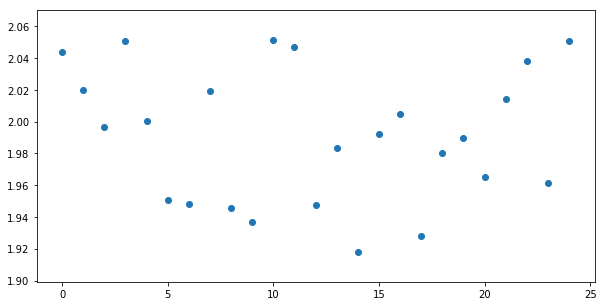

In [488]:
kdnacon_5,costo_train_5,costo_val_5,costo_p_5,pronostico_5,w1e5,b1e5,w2e5,b2e5,w3e5,b3e5=entrenamiento(X_train,Y_train,32,25,0.0001,1,X_validation,Y_validation,X_test,Y_test)

Initialized
Iteracion: 0 Error: 0.44819346
Iteracion: 1 Error: 0.42825752
Iteracion: 2 Error: 0.48634362
Iteracion: 3 Error: 0.438062
Iteracion: 4 Error: 0.48370123
Iteracion: 5 Error: 0.41929963
Iteracion: 6 Error: 0.39484483
Iteracion: 7 Error: 0.4513288
Iteracion: 8 Error: 0.45287824
Iteracion: 9 Error: 0.43944597
Iteracion: 10 Error: 0.4665685
Iteracion: 11 Error: 0.47139895
Iteracion: 12 Error: 0.4626364
Iteracion: 13 Error: 0.4243397
Iteracion: 14 Error: 0.42398483
Iteracion: 15 Error: 0.46723744
Iteracion: 16 Error: 0.4397831
Iteracion: 17 Error: 0.42801464
Iteracion: 18 Error: 0.45776454
Iteracion: 19 Error: 0.4524799
Iteracion: 20 Error: 0.3725739
Iteracion: 21 Error: 0.47971448
Iteracion: 22 Error: 0.48736274
Iteracion: 23 Error: 0.4583133
Iteracion: 24 Error: 0.47243994


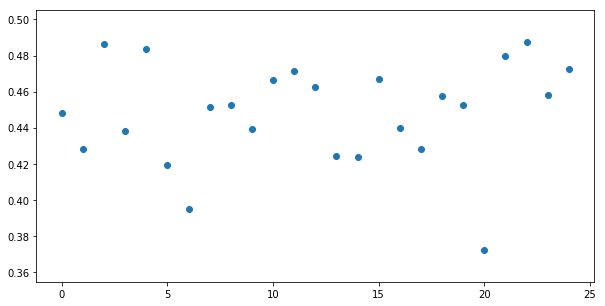

In [489]:
kdnacon_6,costo_train_6,costo_val_6,costo_p_6,pronostico_6,w1e6,b1e6,w2e6,b2e6,w3e6,b3e6=entrenamiento(X_train,Y_train,32,25,0.00001,1,X_validation,Y_validation,X_test,Y_test)

Initialized
Iteracion: 0 Error: 0.028487934
Iteracion: 1 Error: 0.0238491
Iteracion: 2 Error: 0.02864427
Iteracion: 3 Error: 0.016993219
Iteracion: 4 Error: 0.024552304
Iteracion: 5 Error: 0.025405241
Iteracion: 6 Error: 0.024451438
Iteracion: 7 Error: 0.027970504
Iteracion: 8 Error: 0.040024795
Iteracion: 9 Error: 0.03846784
Iteracion: 10 Error: 0.029475858
Iteracion: 11 Error: 0.025162566
Iteracion: 12 Error: 0.034246318
Iteracion: 13 Error: 0.027457677
Iteracion: 14 Error: 0.039491247
Iteracion: 15 Error: 0.036982
Iteracion: 16 Error: 0.021730924
Iteracion: 17 Error: 0.032062963
Iteracion: 18 Error: 0.03199311
Iteracion: 19 Error: 0.028144028
Iteracion: 20 Error: 0.022611877
Iteracion: 21 Error: 0.02975529
Iteracion: 22 Error: 0.024525462
Iteracion: 23 Error: 0.03329037
Iteracion: 24 Error: 0.016043115


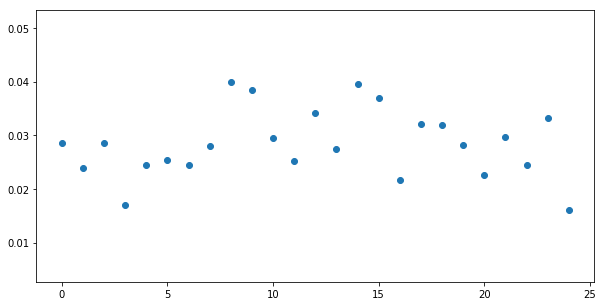

In [490]:
kdnacon_7,costo_train_7,costo_val_7,costo_p_7,pronostico_7,w1e7,b1e7,w2e7,b2e7,w3e7,b3e7=entrenamiento(X_train,Y_train,32,25,0.000001,1,X_validation,Y_validation,X_test,Y_test)

# Resumen de modelos

In [491]:
cadenas = [kdnacon_1,kdnacon_2,kdnacon_3,kdnacon_4,kdnacon_5]
#cadenas

In [492]:
MSES_T = [costo_train_1,costo_train_2,costo_train_3,costo_train_4,costo_train_5]
#MSES_T

In [493]:
MSES_V = [costo_val_1,costo_val_2,costo_val_3,costo_val_4,costo_val_5]
#MSES_V

# Resumen de modelos

In [494]:
Tabla_Resumen = pd.DataFrame(data = {'Cadena de configuración':cadenas,'Train error':MSES_T, 'Validation error':MSES_V}) #
Tabla_Resumen

,Cadena de configuración,Train error,Validation error
0,AS_Reg_GD_epochs=25_LR=1,5.967867,6.583751
1,AS_Reg_GD_epochs=25_LR=0.1,0.004895,0.007444
2,AS_Reg_GD_epochs=25_LR=0.01,0.003852,0.005320
3,AS_Reg_GD_epochs=25_LR=0.001,1.386265,1.272447
4,AS_Reg_GD_epochs=25_LR=0.0001,2.050856,2.013057


# Prónostico con datos de test o prueba

In [495]:
#pronostico_2

In [496]:
#Y_test

In [497]:
#costo_p_2

In [498]:
print("MSE: ", costo_p_3)
Tabla_Resumen_1 = pd.DataFrame(data = {'Y observada':Y_test.tolist(),'Y pronosticada':pronostico_3.tolist()})  
Tabla_Resumen_1

MSE:  0.005831765


,Y observada,Y pronosticada
0,[0.9102612297587722],[0.8084918856620789]
1,[0.9202550589770688],[0.8530585765838623]
2,[0.8000950442239355],[0.8303557634353638]
3,[0.8739032676771618],[0.8103819489479065]
4,[0.8020313929653089],[0.8583569526672363]
5,[0.8996786937802775],[0.8483492136001587]
6,[0.9273620972146369],[0.7834898233413696]
7,[0.9436472866292638],[0.8285493850708008]
8,[0.9232978927135126],[0.847650408744812]
9,[0.9451296928085569],[0.8659799098968506]


# Resultados de la experimentación: 
### Tuve que exprimentar con distintas fuciones de activación, inicialmente probe con Relu sin embargo observe el problema de Dying relu el cual provocaba que al activar las neuorna todas se furean a cero en las dos capas intemedias implementadas, estoa la vez provocaba que al hacer el pronostico diera como resultado que todos los pronosticos tuvieran el mismo valor.
### Tambien se probo con leaky relu con esta se logro solventar el problema de dying relu sin embargo tardava mas en converger a pesar de haber implementado la inicializacion xavier en los parametros entrenables.
### Tambien se utlizo la activacion sigmoid pero podriamos decir que se observo el problema dyin relu que provoca que la activacion de todas las neuronas sea cero 

# Referencias

https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#

https://riptutorial.com/es/pandas/example/5744/renombrar-una-columna

https://stackoverflow.com/questions/46473270/import-dat-file-as-an-array

http://ruder.io/optimizing-gradient-descent/

http://www.cochlea.org/es/sonidos/campo-auditivo-humano

https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78

http://pytolearn.csd.auth.gr/b4-pandas/40/moddfcols.html

https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7

https://datascience.stackexchange.com/questions/5706/what-is-the-dying-relu-problem-in-neural-networks

https://www.tensorflow.org/api_docs/python/tf/nn/leaky_relu

https://pythonprogramming.net/tensorflow-neural-network-session-machine-learning-tutorial/

# Area de pruebas

In [391]:
w1e4,b1e4,w2e4,b2e4,w3e4,b3e4

(array([[-0.08191294, -0.29673746, -0.0311587 ],
        [ 0.23325504, -0.12031305, -0.13500199],
        [-0.2828971 ,  0.22059064, -0.0180194 ],
        [-0.40897006,  0.11152478, -0.01370647],
        [-0.27131814,  0.5582425 ,  0.30023485]], dtype=float32),
 array([[-1.8014618 ,  0.64523864,  1.8836778 ]], dtype=float32),
 array([[ 0.5860563 ,  0.21193507],
        [-0.20517318,  0.5203532 ],
        [ 0.91672355,  0.13444367]], dtype=float32),
 array([[ 0.1838209, -1.6262213]], dtype=float32),
 array([[ 1.0138048],
        [-0.1853113]], dtype=float32),
 array([[-0.19200021]], dtype=float32))

In [392]:
w1e4

array([[-0.08191294, -0.29673746, -0.0311587 ],
       [ 0.23325504, -0.12031305, -0.13500199],
       [-0.2828971 ,  0.22059064, -0.0180194 ],
       [-0.40897006,  0.11152478, -0.01370647],
       [-0.27131814,  0.5582425 ,  0.30023485]], dtype=float32)

In [80]:
b1e4

array([[-0.8607611 ,  0.12672056,  2.0272393 ,  1.5439835 ]],
      dtype=float32)

In [83]:
def relu(x):
    return np.maximum(0,x)

In [84]:
def pronostico(x):
    capa_1 = np.matmul(x,w1e4)+b1e4
    capa_1_a = relu(capa_1)
    capa_2 = np.matmul(capa_1_a,w2e4)+b2e4
    capa_2_a = relu(capa_2)
    capa_final = np.matmul(capa_2_a,w3e4)+b3e4
    capa_final_a = relu(capa_final)
    print(": ", capa_final)

In [85]:
pronostico(X_test)

:  [[ 0.594392  ]
 [-0.75812045]
 [ 0.27657179]
 [ 0.58688047]
 [ 0.22326463]
 [ 0.23493117]
 [ 0.51665761]
 [-0.20350747]
 [-0.29360394]
 [ 0.31170144]
 [ 0.23651125]
 [ 0.25716166]
 [ 0.25792261]
 [ 0.32071429]
 [-0.73925914]
 [ 0.28141487]
 [ 0.35348231]
 [-0.87225129]
 [-0.70899591]
 [-0.22978857]
 [-0.19546413]
 [ 0.61882549]
 [-0.85350426]
 [ 0.35253189]
 [-0.70890489]
 [-0.72048265]
 [-0.76333411]
 [-0.79073912]
 [ 0.31987493]
 [-0.72033846]
 [-0.18222812]
 [-0.18079446]
 [-0.85323433]
 [ 0.26003678]
 [ 0.26067758]
 [-0.18049489]
 [-0.7110868 ]
 [ 0.23558209]
 [ 0.59420949]
 [ 0.61855316]
 [ 0.33085893]
 [ 0.61834122]
 [ 0.35177905]
 [-0.72511618]
 [-0.71031129]
 [ 0.61874778]
 [-0.23490415]
 [-0.74942688]
 [-0.22026244]
 [ 0.61917468]
 [-0.8018433 ]
 [ 0.34005655]
 [-0.8728921 ]
 [ 0.3210347 ]
 [ 0.25756188]
 [ 0.25786174]
 [-0.18157704]
 [-0.73858013]
 [ 0.52426828]
 [ 0.35325721]
 [ 0.25745803]
 [ 0.61913713]
 [-0.18253825]
 [-0.25329535]
 [ 0.54992825]
 [-0.7414539 ]
 [ 0.60

In [623]:
X_test

array([[1.60000e+03, 6.70000e+00, 1.01600e-01, 3.17000e+01, 5.92927e-03],
       [5.00000e+02, 9.50000e+00, 2.54000e-02, 3.96000e+01, 4.49821e-03],
       [3.15000e+02, 1.54000e+01, 5.08000e-02, 7.13000e+01, 2.64269e-02],
       ...,
       [8.00000e+02, 4.00000e+00, 3.04800e-01, 7.13000e+01, 4.97773e-03],
       [3.15000e+03, 7.30000e+00, 2.28600e-01, 5.55000e+01, 1.11706e-02],
       [5.00000e+03, 0.00000e+00, 2.28600e-01, 7.13000e+01, 2.14345e-03]])

In [499]:
def entrenamiento(equis,yes,batch_size,epochs,lr,imprimir_cada,XV,YV,XP,YP):
    
    with tf.Session(graph = grafofefonet) as session:
        batches = int(equis.shape[0] / batch_size)
        iteracion_k = []
        costo_k = []
        # incializando variables
        tf.global_variables_initializer().run()
        print('Initialized')
        
        for epoch in range(epochs):
            for i in range(batches):
                offset = i * epoch 
                x = equis[offset: offset + batch_size] 
                y = yes[offset: offset + batch_size]
                
            # sesion que ejecuta los nodos y envia informacion con feed_dict al nodo del learning rate
            costo_s, optimizacion_s = session.run([costo_g, optimizacion_g],feed_dict={X:x, Y:y, ph_lr_g:lr})
            
            iteracion_k.append(epoch)
            costo_k.append(costo_s)
        
            if (epoch % imprimir_cada == 0):
                print("Iteracion:", epoch, "Error:", costo_s) ##
        
        ## usando el grafo con los datos de validación 
        costo_v_s, pronostico_v_s = session.run([costo_g, kpa_final_act], feed_dict={X:XV, Y:YV})
        
        ## usando el grafo con los datos de prueba
        costo_p_s, pronostico_p_s = session.run([costo_g, kpa_final_act], feed_dict={X:XP, Y:YP})
                       
    cadena_config = "AS""_Reg""_GD""_epochs="+str(epochs)+"_LR="+str(lr)
    
    ## Gráfica 
    fig  = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(iteracion_k,costo_k)
    plt.show()
    
    TableOut = pd.DataFrame({'Iteración k':iteracion_k, 'Costo':costo_k}) #, 'W_k':w_k, 'Dirección': pk, 'Norma': norma_k
    return cadena_config, costo_s, costo_v_s, costo_p_s, pronostico_p_s   